# Homework 03: Appleton Clustering and Recommender Systems

## Section 1: Import Libraries

### Description
This code imports the needed libraries for the project. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('ggplot')
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


### Summary
- All of the libraries imported without issue.
- 'ggplot' is Grammar of Graphics plotting style, chosen for its aesthetic 

## Section 2: Cluster Analysis for ALL borrowers (member_id) - Import Data

### Description
- This code imports the csv files into a data frame named 'loan_cluster'
- The code then drops a column from the dataframe
- The code the performs a scaler function on the dataframe and places it into a new dataframe named "loan_scaled"

In [3]:
#Import csv files into loan_cluster
loan_cluster = pd.read_csv('data/Appleton_Cluster.csv', header=0,index_col=0)

In [4]:
#Drop the 'member_id' column
loan_cluster = loan_cluster.drop(['member_id'], axis=1)

In [5]:
loan_cluster

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,risk_factor,emp_length,annual_inc,total_debt,...,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_credit_rv,dti,loan_is_bad_num,loan_currency_num
0,2000,2000,2000.0,36,17.27,71.58,-3,2.0,26000.0,6661.2,...,0,70.0,1,0,0.0,36339.0,9800.0,0.256,0,1
1,11700,11700,11700.0,36,17.27,418.72,-3,5.0,120000.0,16164.0,...,0,0.0,1,0,0.0,118473.0,6600.0,0.135,1,0
2,15000,15000,15000.0,36,17.27,536.81,-3,3.0,75000.0,11460.0,...,0,28.0,1,0,0.0,14888.0,14400.0,0.153,0,1
3,5000,5000,5000.0,36,17.27,178.94,-3,10.0,29000.0,4271.7,...,0,0.0,1,0,367.0,11564.0,8000.0,0.147,0,0
4,10000,10000,10000.0,36,17.27,357.88,-3,7.0,42000.0,10357.2,...,0,0.0,1,0,0.0,29488.0,24300.0,0.247,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49952,34775,34775,34775.0,36,24.89,1380.63,-6,7.0,150000.0,39675.0,...,0,0.0,1,0,0.0,0.0,0.0,0.264,1,0
49953,24250,24250,24250.0,36,24.89,962.77,-6,7.0,100000.0,19440.0,...,0,0.0,1,0,0.0,0.0,0.0,0.194,0,0
49954,18250,18250,18250.0,60,24.89,534.49,-6,3.0,74500.0,23467.5,...,0,0.0,1,0,0.0,0.0,0.0,0.315,0,0
49955,11000,11000,11000.0,60,24.89,322.16,-6,5.0,50000.0,11590.0,...,0,0.0,1,0,0.0,0.0,0.0,0.232,1,1


In [6]:
#scaler function into new dataframe loan_scaled
scaler = StandardScaler()

In [7]:
scaler.fit(loan_cluster)
StandardScaler(copy=True, with_mean=True, with_std=True)
loan_scaled = scaler.transform(loan_cluster)
loan_scaled = pd.DataFrame(loan_scaled)

## Summary


## Section 3: K-Means for ALL borrowers

## Section 3.1: KMeans for 3 Groups 

### Description
- This section performs K-means clustering on all borrowers for 3 clusters. 
- In section 3.1.1, the code creates KMeans clusters, then an inertia model, using the loan_cluster (unscaled) data. 
- In section 3.1.2, the code create KMeans clusters, then an inertia model, using the loan_scaled (scaled) data. 

- The inertia model provides a way to see the ideal number of clusters for the dataset, and requires some interpretation. 

- The code creates two dataframes named "labels3raw", and "labels3scaled", to put the predicted clusters into. 
- The code then creates a new dataframe named "results" that concats "loan_cluster" to "labels3raw", then "results" to "labels3scaled" 

### Section 3.1.1: KMeans for 3 Groups using raw data

In [8]:
# Create a K-Means for 3 clusters
model = KMeans(n_clusters=3, n_init=10)
model.fit(loan_cluster)
# Put the predicted clusters in labels3raw dataframe
labels3raw = model.predict(loan_cluster)
# concat labels3raw and loan_cluster into a new dataframe named results
labels3raw = pd.DataFrame(labels3raw)
labels3raw = labels3raw.rename(columns = {0: 'labels3raw'})

### Create an inertia model from raw data

iteration 1 done
iteration 2 done
iteration 3 done
iteration 4 done
iteration 5 done
iteration 6 done
iteration 7 done
iteration 8 done
iteration 9 done
iteration 10 done
iteration 11 done
iteration 12 done
iteration 13 done
iteration 14 done
iteration 15 done
iteration 16 done
iteration 17 done
iteration 18 done
iteration 19 done
iteration 20 done


<function matplotlib.pyplot.show(close=None, block=None)>

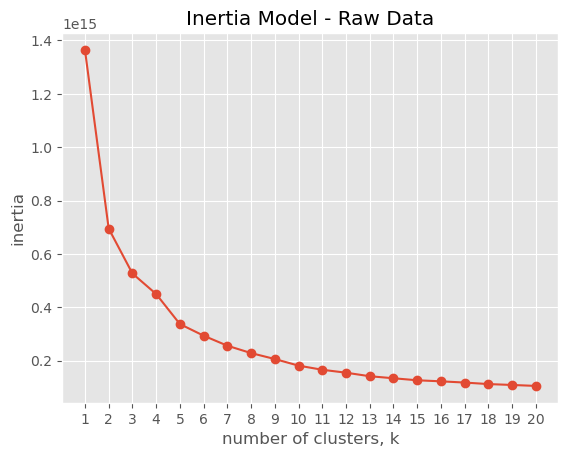

In [9]:
# Create inertia model using "ks=range(1,21)", add print("iteration {} done".format(k)) to keep tabs
ks = range(1,21)
inertias = []

for k in ks: 
    model = KMeans(n_clusters = k, n_init=2)
    model.fit(loan_cluster)
    inertias.append(model.inertia_)
    print(f"iteration {k} done")
    
plt.plot(ks, inertias, '-o')
plt.title('Inertia Model - Raw Data')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show

### Section 3.1.2: KMeans for 3 Groups using scaled data

In [10]:
# Create a K-Means for 3 clusters
model = KMeans(n_clusters=3, n_init=10)
model.fit(loan_scaled)
# Put the predicted clusters in labels3raw dataframe
labels3scaled = model.predict(loan_scaled)
# concat labels3raw and loan_cluster into a new dataframe named results
labels3scaled = pd.DataFrame(labels3scaled)
labels3scaled = labels3scaled.rename(columns = {0: 'labels3scaled'})

### Create an inertia model from scaled data

iteration 1 done
iteration 2 done
iteration 3 done
iteration 4 done
iteration 5 done
iteration 6 done
iteration 7 done
iteration 8 done
iteration 9 done
iteration 10 done
iteration 11 done
iteration 12 done
iteration 13 done
iteration 14 done
iteration 15 done
iteration 16 done
iteration 17 done
iteration 18 done
iteration 19 done
iteration 20 done


<function matplotlib.pyplot.show(close=None, block=None)>

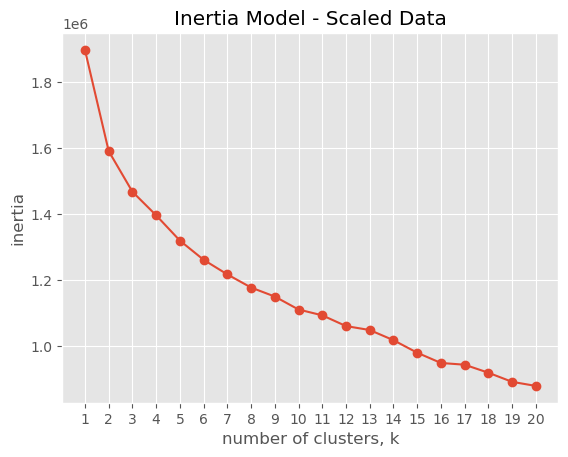

In [11]:
# Create inertia model using "ks=range(1,21)", add print("iteration {} done".format(k)) to keep tabs
ks = range(1,21)
inertias = []

for k in ks: 
    model = KMeans(n_clusters = k, n_init=10)
    model.fit(loan_scaled)
    inertias.append(model.inertia_)
    print(f"iteration {k} done")
    
plt.plot(ks, inertias, '-o')
plt.title('Inertia Model - Scaled Data')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show

In [12]:
results = pd.concat([loan_cluster, labels3raw], axis=1, join='inner')
results = pd.concat([results, labels3scaled], axis=1, join='inner')

Text(0.5, 1.0, 'KMeans 3 Cluster - Scaled Data')

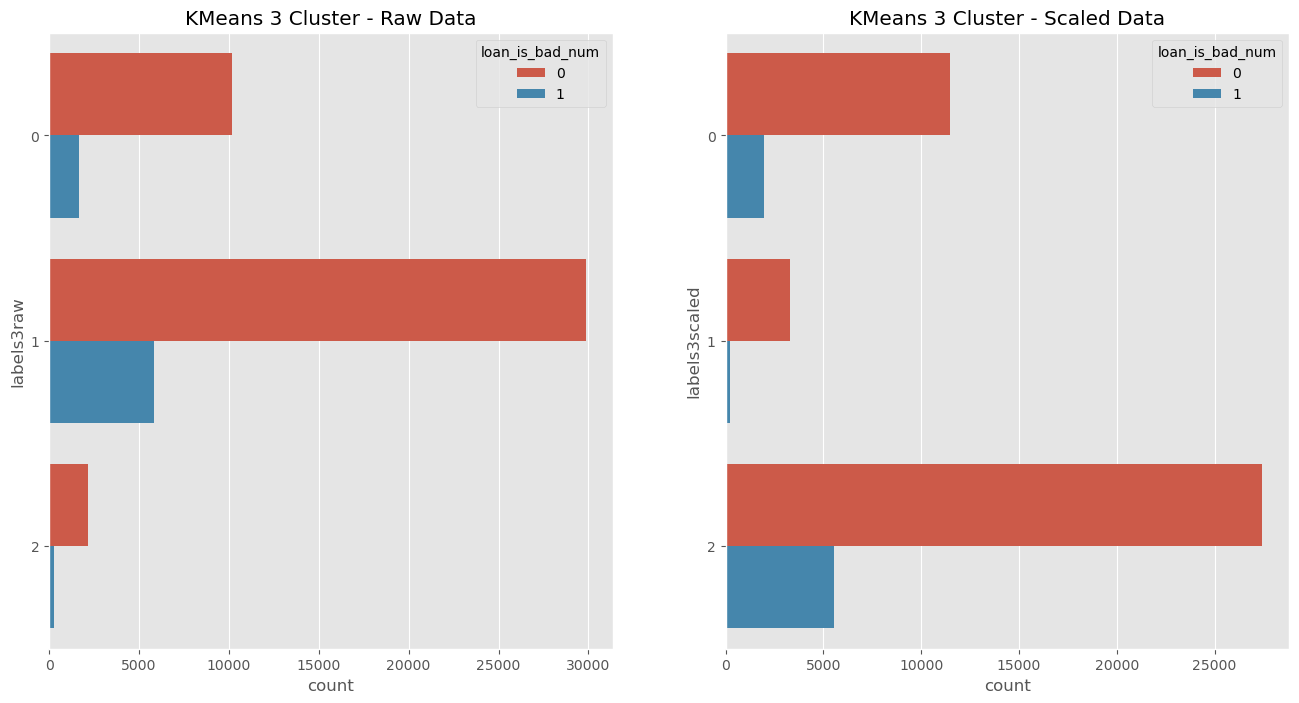

In [13]:
# Create a countplot for results of the raw and scaled data predictions 
fig, axes = plt.subplots(1,2, figsize = (16,8))
sns.countplot(y="labels3raw",hue='loan_is_bad_num', ax = axes[0], data = results)
axes[0].set_title('KMeans 3 Cluster - Raw Data')
sns.countplot(y="labels3scaled",hue='loan_is_bad_num', ax = axes[1], data = results)
axes[1].set_title('KMeans 3 Cluster - Scaled Data')

### Summary
- This code was originally only supposed to be one KMeans cluster and one inertia model, but I chose to analyze the difference between the two groups and append them to the results dataframe, to see which was more appropriate to use. 

- One thing that was noteworthy about the code was the use of the n_init=10 in the KMeans function calls. When using n_init='auto', or n_init=5, the shape of the distributions and inertia models slightly changed. 10 was the default, so that is what I stayed with for this exercise. 

- <b>Regarding the predicted labels:</b> 
    - The distribution of the 3 clusters were relatively the same between the raw and the scaled data, as can be seen in the charts above. There was a slightly more even shape to the scaled data, so I will use that.  
- <b>Regarding the inertia models:</b> 
    - The inertia models were difficult to interpret. The raw data appears to begin flattening at 8, and the scaled data is noticeably more linear with a slight hump at 8-9. Therefore, I am going to choose 8 clusters for the next section. 


## Section 3.2: KMeans for 8 Groups

### Description
- This code creates a Kmeans cluster based upon the results of the inertia model chart from the previous section . 
- In Section 3.2.1, the KMeans cluster prediction is run with the loan_cluster (unscaled) data. 
- The data is then shown next to the unscaled prediction from the 3 cluster KMeans results on a countplot. 
- In Section 3.2.2, the KMeans cluster prediction is run with the loan_scaled (scaled) data. 
- The scaled KMeans prediction is then compared with the 8 cluster KMeans results on a countplot. 
- The "labels8raw" and "labels8scaled" data are then appended to the end of the results DataFrame. 
 


### Section 3.2.1: KMeans 8 Cluster with Raw Data

In [14]:
# Create a K-means for 8 clusters with raw data
model = KMeans(n_clusters=8, n_init=10)
model.fit(loan_cluster)
# Place predicted clusters into "labels8" dataframe
labels8raw = model.predict(loan_cluster)
labels8raw = pd.DataFrame(labels8raw)
labels8raw = labels8raw.rename(columns = {0: 'labels8raw'})

In [15]:
#concat "labels8" to results
results = pd.concat([results,labels8raw], axis=1, join='inner')

Text(0.5, 1.0, '8 Clusters - Raw Data')

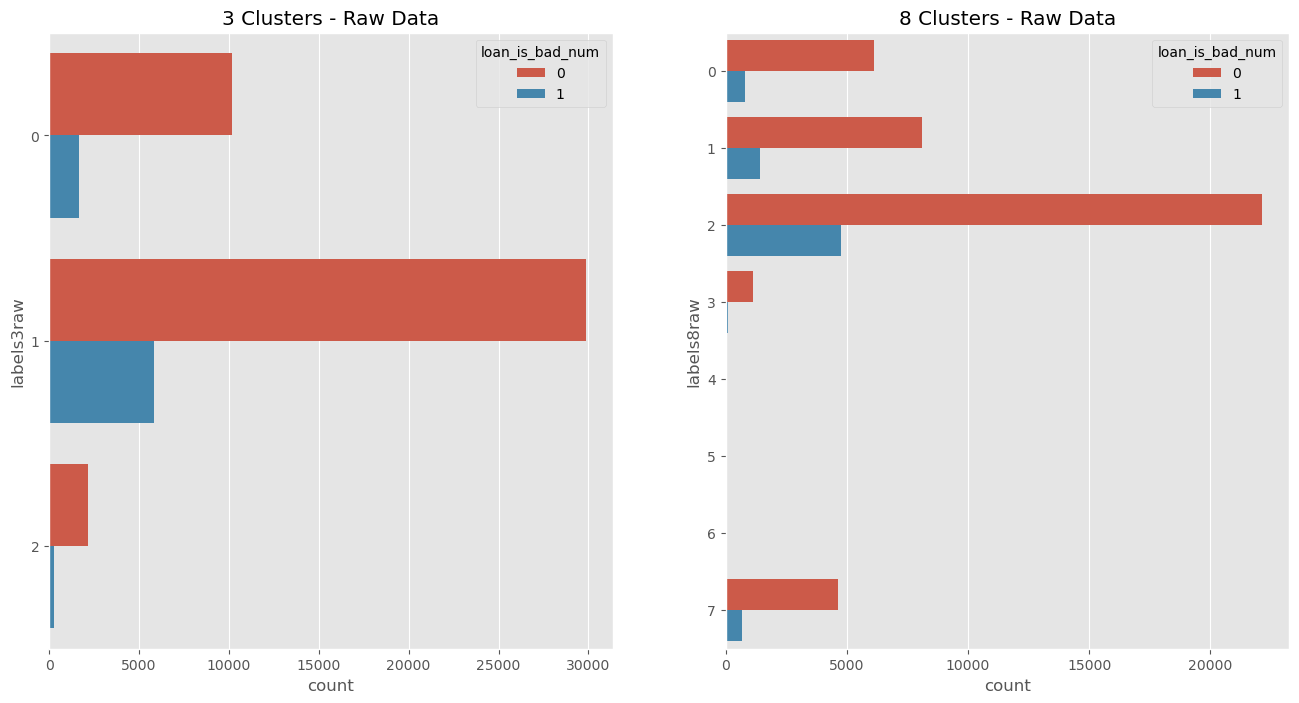

In [16]:
# Create a countplot for results 
fig, axes = plt.subplots(1,2, figsize = (16,8))
sns.countplot(y="labels3raw",hue='loan_is_bad_num', ax = axes[0], data = results)
axes[0].set_title('3 Clusters - Raw Data')
sns.countplot(y="labels8raw",hue='loan_is_bad_num', ax = axes[1], data = results)
axes[1].set_title('8 Clusters - Raw Data')

In [17]:
# This code splits out the resulting rows for each cluster group into their own DataFrame for a deeper dive into their characteristics
cluster0 = results[results['labels8raw'] == 0]
cluster1 = results[results['labels8raw'] == 1]
cluster2 = results[results['labels8raw'] == 2]
cluster3 = results[results['labels8raw'] == 3]
cluster4 = results[results['labels8raw'] == 4]
cluster5 = results[results['labels8raw'] == 5]
cluster6 = results[results['labels8raw'] == 6]
cluster7 = results[results['labels8raw'] == 7]
cluster0 = pd.DataFrame(cluster0)
cluster1 = pd.DataFrame(cluster1)
cluster2 = pd.DataFrame(cluster2)
cluster3 = pd.DataFrame(cluster3)
cluster4 = pd.DataFrame(cluster4)
cluster5 = pd.DataFrame(cluster5)
cluster6 = pd.DataFrame(cluster6)
cluster7 = pd.DataFrame(cluster7)

In [18]:
# This code analyzes some of the attributes that may be influencing the clustering.

num_clusters = 8
attributes = [ 'annual_inc', 'loan_amnt', 'term', 'int_rate', 'total_debt', 'dti']
means = {attr: [] for attr in attributes} # dictionary to store mean attributes
count = {attr: [] for attr in attributes} # dictionary to store counts of each attribute

# For loop to define dictionary for means and count of each attribute
for i in range(num_clusters):
    cluster_name = f"cluster{i}"
    cluster_df = eval(cluster_name)
    
    for attr in attributes:
        means[attr].append(cluster_df[attr].mean())
        count[attr].append(cluster_df[attr].count())

# For loop to display the values for quick analysis
for attr in attributes:
    print(f"{attr.upper()} ")
    for i in range(num_clusters):
        if attr != 'dti': 
            print(f"Mean {attr} for cluster{i}: {int(means[attr][i])} ({count[attr][i]} entries)")
        else: 
            print(f"Mean {attr} for cluster{i}: {means[attr][i]} ({count[attr][i]} entries)")
    print("\n")    

ANNUAL_INC 
Mean annual_inc for cluster0: 117328 (6966 entries)
Mean annual_inc for cluster1: 67588 (9495 entries)
Mean annual_inc for cluster2: 49624 (26897 entries)
Mean annual_inc for cluster3: 163892 (1236 entries)
Mean annual_inc for cluster4: 458954 (42 entries)
Mean annual_inc for cluster5: 5000000 (1 entries)
Mean annual_inc for cluster6: 6620889 (2 entries)
Mean annual_inc for cluster7: 99569 (5318 entries)


LOAN_AMNT 
Mean loan_amnt for cluster0: 20067 (6966 entries)
Mean loan_amnt for cluster1: 14662 (9495 entries)
Mean loan_amnt for cluster2: 10868 (26897 entries)
Mean loan_amnt for cluster3: 20966 (1236 entries)
Mean loan_amnt for cluster4: 27188 (42 entries)
Mean loan_amnt for cluster5: 35000 (1 entries)
Mean loan_amnt for cluster6: 22412 (2 entries)
Mean loan_amnt for cluster7: 18087 (5318 entries)


TERM 
Mean term for cluster0: 42 (6966 entries)
Mean term for cluster1: 41 (9495 entries)
Mean term for cluster2: 39 (26897 entries)
Mean term for cluster3: 42 (1236 entrie

### Section 3.2.2: 8 Cluster KMeans with Scaled Data

In [19]:
# Create a K-means for 8 clusters with raw data
model = KMeans(n_clusters=8, n_init=10)
model.fit(loan_scaled)
# Place predicted clusters into "labels8" dataframe
labels8scaled = model.predict(loan_scaled)
labels8scaled = pd.DataFrame(labels8scaled)
labels8scaled = labels8scaled.rename(columns = {0: 'labels8scaled'})

In [20]:
#concat "labels8" to results
results = pd.concat([results,labels8scaled], axis=1, join='inner')

Text(0.5, 1.0, '8 Clusters - Scaled Data')

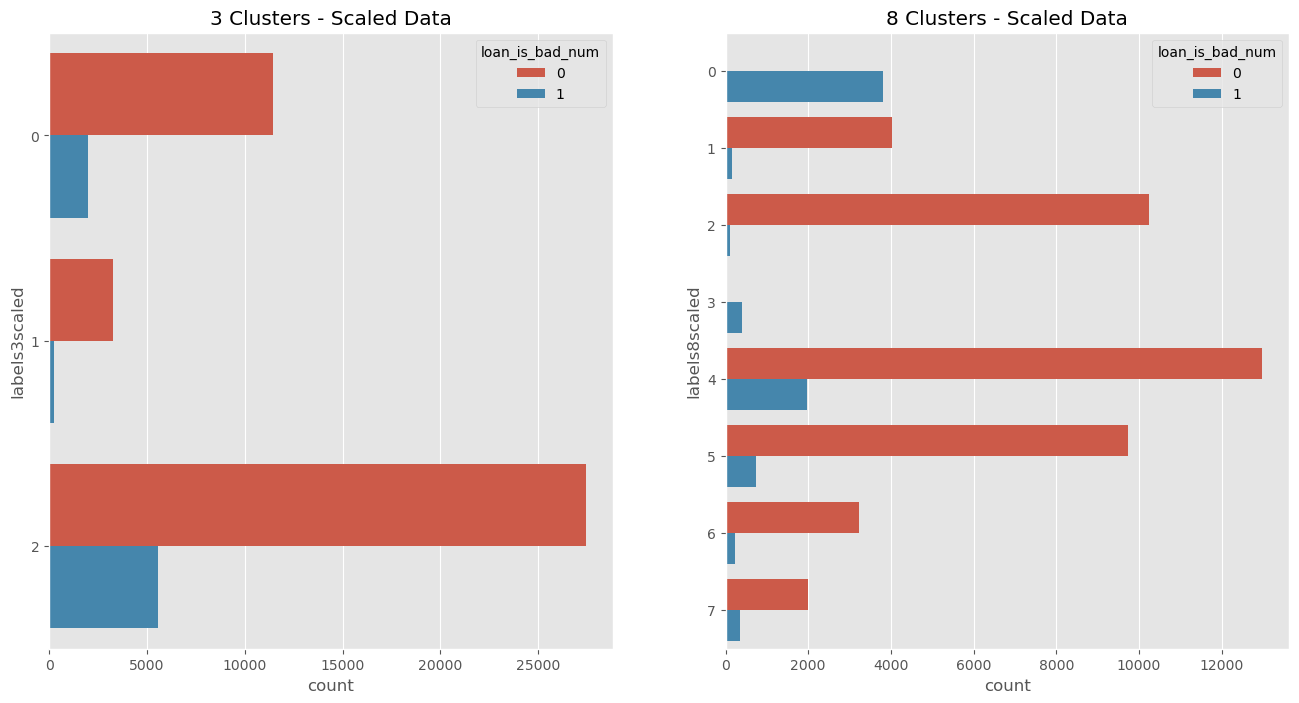

In [21]:
# Create a countplot for results 
fig, axes = plt.subplots(1,2, figsize = (16,8))
sns.countplot(y="labels3scaled",hue='loan_is_bad_num', ax = axes[0], data = results)
axes[0].set_title('3 Clusters - Scaled Data')
sns.countplot(y="labels8scaled",hue='loan_is_bad_num', ax = axes[1], data = results)
axes[1].set_title('8 Clusters - Scaled Data')

In [22]:
# This code splits out the resulting rows for each cluster group into their own DataFrame for a deeper dive into their characteristics
cluster0 = results[results['labels8scaled'] == 0]
cluster1 = results[results['labels8scaled'] == 1]
cluster2 = results[results['labels8scaled'] == 2]
cluster3 = results[results['labels8scaled'] == 3]
cluster4 = results[results['labels8scaled'] == 4]
cluster5 = results[results['labels8scaled'] == 5]
cluster6 = results[results['labels8scaled'] == 6]
cluster7 = results[results['labels8scaled'] == 7]
cluster0 = pd.DataFrame(cluster0)
cluster1 = pd.DataFrame(cluster1)
cluster2 = pd.DataFrame(cluster2)
cluster3 = pd.DataFrame(cluster3)
cluster4 = pd.DataFrame(cluster4)
cluster5 = pd.DataFrame(cluster5)
cluster6 = pd.DataFrame(cluster6)
cluster7 = pd.DataFrame(cluster7)


In [23]:
# This code analyzes some of the attributes that may be influencing the clustering.

num_clusters = 8
attributes = [ 'annual_inc', 'loan_amnt', 'term', 'int_rate', 'total_debt', 'dti'] # features being analyzed. 
means = {attr: [] for attr in attributes} # dictionary to store mean attributes
count = {attr: [] for attr in attributes} # dictionary to store counts of each attribute

# For loop to define dictionary for means and count of each attribute
for i in range(num_clusters):
    cluster_name = f"cluster{i}" # f string to create cluster[i] name
    cluster_df = eval(cluster_name) # eval() evaluates whether the expression is a legal Python expression. 
    
    for attr in attributes:
        means[attr].append(cluster_df[attr].mean()) # appends the mean value of the attribute to the means dictionary
        count[attr].append(cluster_df[attr].count())# appends the count value of the attribute to the count dictionary

# For loop to display the values for quick analysis
for attr in attributes: # for the list of attributes, loop
    print(f"{attr.upper()} ") 
    for i in range(num_clusters): # For the number of clusters, loop 
        if attr != 'dti': # if it is dti, I don't want it to convert to int
            print(f"Mean {attr} for cluster{i}: {int(means[attr][i])} ({count[attr][i]} entries)") # Displays the information needed
        else: # leaves the attribute value as a flaot, so we can see the value of the debt to income ratio
            print(f"Mean {attr} for cluster{i}: {means[attr][i]} ({count[attr][i]} entries)") #Displays the information needed
    print("\n")    

ANNUAL_INC 
Mean annual_inc for cluster0: 68784 (3819 entries)
Mean annual_inc for cluster1: 124295 (4176 entries)
Mean annual_inc for cluster2: 80093 (10358 entries)
Mean annual_inc for cluster3: 84035 (392 entries)
Mean annual_inc for cluster4: 50269 (14940 entries)
Mean annual_inc for cluster5: 69455 (10461 entries)
Mean annual_inc for cluster6: 84123 (3459 entries)
Mean annual_inc for cluster7: 63999 (2352 entries)


LOAN_AMNT 
Mean loan_amnt for cluster0: 18083 (3819 entries)
Mean loan_amnt for cluster1: 28663 (4176 entries)
Mean loan_amnt for cluster2: 18191 (10358 entries)
Mean loan_amnt for cluster3: 23768 (392 entries)
Mean loan_amnt for cluster4: 7392 (14940 entries)
Mean loan_amnt for cluster5: 8785 (10461 entries)
Mean loan_amnt for cluster6: 22920 (3459 entries)
Mean loan_amnt for cluster7: 11283 (2352 entries)


TERM 
Mean term for cluster0: 45 (3819 entries)
Mean term for cluster1: 46 (4176 entries)
Mean term for cluster2: 39 (10358 entries)
Mean term for cluster3: 52 (3

### Summary

- In this section, the 8 cluster KMeans prediction models were created using both the raw and scaled data. 
- The data was then compared to the 3 cluster KMeans prediction models. The raw data showed greater variation in size, while the scaled data showed more uniformity across the clusters. This is expounded upon below. 
- The mean values were then calculated and displayed for each cluster in the raw and scaled datasets. This information provided insight into the logic behind the clustering activity, and this is also expounded upon below. 

## Section 3.3: Summary of Clusters

### Description
- This section summarizes the results in markdown, and provides insights into questions about the largest clusters and the smallest clusters within the KMeans results. 

### Summary
- This section answered questions about the results from the KMeans clustering performed in section 3. 
- Using some python code to analyze the mean values of some important statistics, some of the factors that the clustering algorithm was using became obvious. Other aspects, especially of the scaled data, was not as obvious. 
- The major takeaway: the higher the annual income, and lower the debt, the more you can borrow due to the debt-to-income calculation used by the lender. The majority of the lender's customers are low on the annual income scale, and therefore are loaned out the lowest mean amounts. The lender

#### Results of Raw Data 
- The largest groups in the raw data results dataset represent those with the lowest mean annual incomes, and the lowest mean loan amounts. The lower mean loan amounts are likely to keep their debt-to-income ratio at the acceptable level of risk for the lender. 
-  The small outlier groups contain borrowers with average annual incomes in the millions of dollars. They make up only a small fraction of the total number of borrowers, but are distinct enough in the data for the KMeans algorithm to differentiate them. 
- These results provide insight into how a lender's debt-to-income ratio assessments and rules can differentiate the customer base. 
- Upon first glance at the countplot, I thought that maybe six distinct clusters were a better choice, but after looking at the difference in mean annual income of the two outlier groups, I think it is appropriate for them to be placed into seperate clusters. 
- An interesting distinction occurs with third and fourth largest clusters, where the incomes are slightly different, but the amount borrowed is less due to the debt-to-income ratio of one versus the other. 

#### Results for Scaled Data
- The largest group in the scaled data was also the group with the lowest mean annual income and the lowest mean loan amounts. The other large groups were more spread out, and were more difficult to interpret. 
- The smallest group (392) seems to have correlated with a high mean loan amount and a high mean debt-to-income ratio. 
- There were two clusters with 100% bad loans, and these were the clusters with the highest loan amounts and highest debt-to-income ratios. These high risk loans were clustered together, and provide some insights into how the clustering algorithm worked to group loans together. 
- These results were much more difficult to classify using basic mean statistics pulled from each cluster. 

## Section 4: Cluster Analysis for the largest group

## Section 4.1: Data Preparation

### Description
- This code imports a csv file into a new DataFrame called loan_largest

In [24]:
loan_largest = pd.read_csv('data/large_cluster.csv',header=0, index_col=None)

### Summary
- This code succesfully imported csv data into the loan_largest DataFrame.
- This appears to be 11325 rows of the largest cluster from a previous KMeans run. The K3 - Predicted, and K8 - Predicted mirror the labels3raw/labels3scaled, and labels8raw/labels8scaled values from my work above. 

## Section 4.2: Create a KMeans cluster on one customer group

### Description
- This code creates a 3 cluster KMeans on the loan_largest dataframe. 
- It then fits, and creates a prediction. 
- It then runs an inertia model to find the ideal number of clusters to run. 
- Then it creates a KMeans cluster based upon the output of the inertia model, and creates a countplot analyzing the 3 vs. ideal number. 

In [33]:
model = KMeans(n_clusters=3, n_init=10)
model.fit(loan_largest)
# Put the predicted clusters in loan_largest_predict dataframe
labels3 = model.predict(loan_largest)
# concat loan_largest_predict and loan_cluster into a new dataframe named results
labels3 = pd.DataFrame(labels3)
labels3 = labels3.rename(columns = {0: 'labels3'})
results_largeloan = pd.concat([loan_largest,labels3], axis=1, join='inner')

iteration 1 done
iteration 2 done
iteration 3 done
iteration 4 done
iteration 5 done
iteration 6 done
iteration 7 done
iteration 8 done
iteration 9 done
iteration 10 done
iteration 11 done
iteration 12 done
iteration 13 done
iteration 14 done
iteration 15 done
iteration 16 done
iteration 17 done
iteration 18 done
iteration 19 done
iteration 20 done


<function matplotlib.pyplot.show(close=None, block=None)>

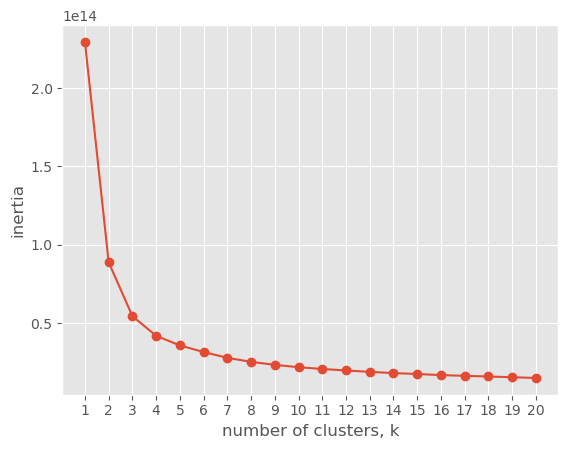

In [24]:
# Create inertia model using "ks=range(1,21)", add print("iteration {} done".format(k)) to keep tabs
ks = range(1,21)
inertias = []

for k in ks: 
    model = KMeans(n_clusters = k, n_init=10)
    model.fit(loan_largest)
    inertias.append(model.inertia_)
    print(f"iteration {k} done")
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show

In [32]:
# Create a KMeans cluster based on inertia model
model = KMeans(n_clusters=5, n_init=10)
model.fit(loan_largest)
# Put the predicted clusters in loan_largest_predict dataframe
labels5 = model.predict(loan_largest)
# concat loan_largest_predict and loan_cluster into a new dataframe named results
labels5 = pd.DataFrame(labels5)
labels5 = labels5.rename(columns = {0: 'labels5'})
results_largeloan = pd.concat([results_largeloan,labels5], axis=1, join='inner')

NameError: name 'results_largeloan' is not defined

Text(0.5, 1.0, '5 Clusters')

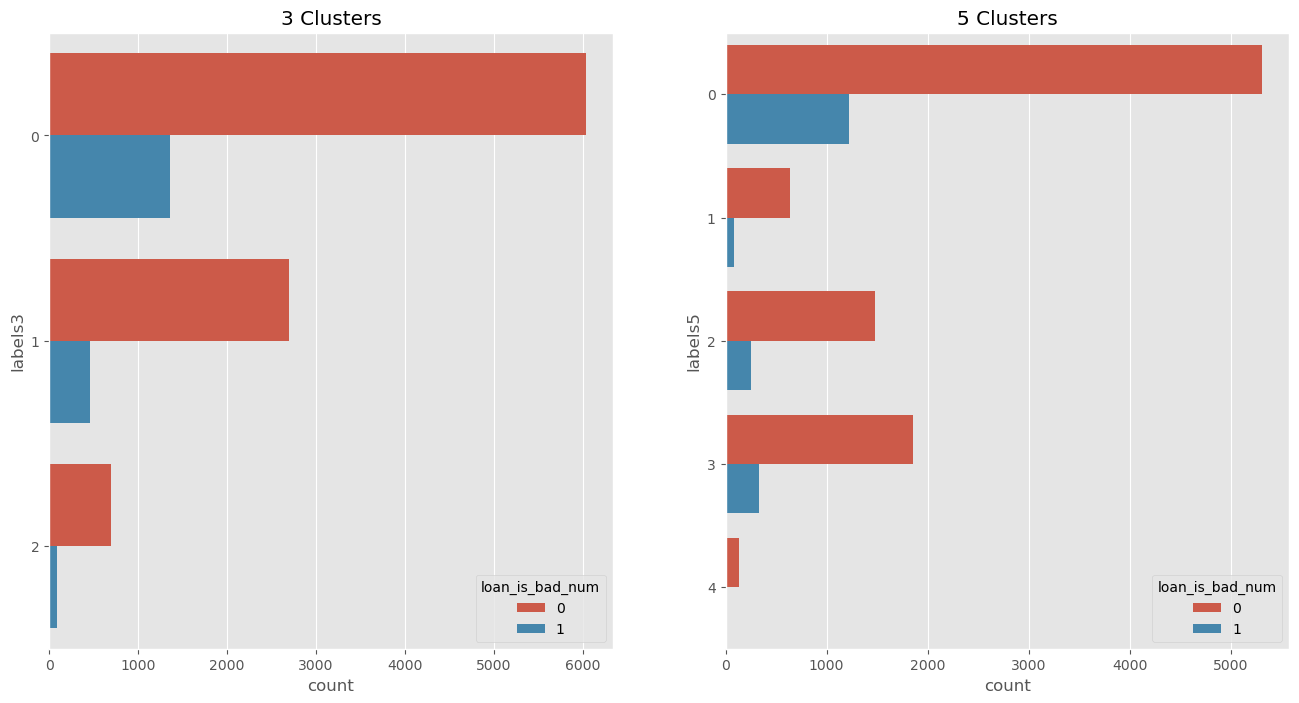

In [26]:
# Create a countplot for results 
fig, axes = plt.subplots(1,2, figsize = (16,8))
sns.countplot(y="labels3",hue='loan_is_bad_num', data = results_largeloan, ax= axes[0])
axes[0].set_title('3 Clusters')
sns.countplot(y="labels5",hue='loan_is_bad_num', data = results_largeloan, ax= axes[1])
axes[1].set_title('5 Clusters')

In [27]:
# This code splits out the resulting rows for each cluster group into their own DataFrame for a deeper dive into their characteristics
cluster0 = results_largeloan[results_largeloan['labels5'] == 0]
cluster1 = results_largeloan[results_largeloan['labels5'] == 1]
cluster2 = results_largeloan[results_largeloan['labels5'] == 2]
cluster3 = results_largeloan[results_largeloan['labels5'] == 3]
cluster4 = results_largeloan[results_largeloan['labels5'] == 4]
cluster0 = pd.DataFrame(cluster0)
cluster1 = pd.DataFrame(cluster1)
cluster2 = pd.DataFrame(cluster2)
cluster3 = pd.DataFrame(cluster3)
cluster4 = pd.DataFrame(cluster4)

# I'm sure this code could be way more efficient, but it was written for this specific endcase.

In [28]:
# This code analyzes some of the attributes that may be influencing the clustering.

num_clusters = 5 #Changes for each set.
attributes = [ 'annual_inc', 'loan_amnt', 'term', 'int_rate', 'total_debt', 'dti'] # features being analyzed. 
means = {attr: [] for attr in attributes} # dictionary to store mean attributes
count = {attr: [] for attr in attributes} # dictionary to store counts of each attribute

# For loop to define dictionary for means and count of each attribute
for i in range(num_clusters):
    cluster_name = f"cluster{i}" # f string to create cluster[i] name
    cluster_df = eval(cluster_name) # eval() evaluates whether the expression is a legal Python expression. 
    
    for attr in attributes:
        means[attr].append(cluster_df[attr].mean()) # appends the mean value of the attribute to the means dictionary
        count[attr].append(cluster_df[attr].count())# appends the count value of the attribute to the count dictionary

# For loop to display the values for quick analysis
for attr in attributes: # for the list of attributes, loop
    print(f"{attr.upper()} ") 
    for i in range(num_clusters): # For the number of clusters, loop 
        if attr != 'dti': # if it is dti, I don't want it to convert to int
            print(f"Mean {attr} for cluster{i}: {int(means[attr][i])} ({count[attr][i]} entries)") # Displays the information needed
        else: # leaves the attribute value as a flaot, so we can see the value of the debt to income ratio
            print(f"Mean {attr} for cluster{i}: {means[attr][i]} ({count[attr][i]} entries)") #Displays the information needed
    print("\n")    

ANNUAL_INC 
Mean annual_inc for cluster0: 61605 (6531 entries)
Mean annual_inc for cluster1: 104360 (722 entries)
Mean annual_inc for cluster2: 78051 (1736 entries)
Mean annual_inc for cluster3: 61539 (2195 entries)
Mean annual_inc for cluster4: 149160 (141 entries)


LOAN_AMNT 
Mean loan_amnt for cluster0: 9108 (6531 entries)
Mean loan_amnt for cluster1: 8733 (722 entries)
Mean loan_amnt for cluster2: 8969 (1736 entries)
Mean loan_amnt for cluster3: 9016 (2195 entries)
Mean loan_amnt for cluster4: 8557 (141 entries)


TERM 
Mean term for cluster0: 36 (6531 entries)
Mean term for cluster1: 36 (722 entries)
Mean term for cluster2: 36 (1736 entries)
Mean term for cluster3: 36 (2195 entries)
Mean term for cluster4: 36 (141 entries)


INT_RATE 
Mean int_rate for cluster0: 14 (6531 entries)
Mean int_rate for cluster1: 11 (722 entries)
Mean int_rate for cluster2: 12 (1736 entries)
Mean int_rate for cluster3: 13 (2195 entries)
Mean int_rate for cluster4: 11 (141 entries)


TOTAL_DEBT 
Mean to

### Summary
- Similar to the code above, this code dives deeper into the largest cluster from the code above and divides them into clusters. 
- The largest loan group, when divided into 5 clusters, shows that the largest subclusters are the lowest mean annual income and highest debt-to-incomes. 
- The smallest loan group within these subclusters are those with high mean incomes and low debt-to-income. 

## Section 4.3: Hierarchical Clustering on a Specific Group

### Description
- This code creates a dendrogram to perform hierarchical clustering to visualize groupings within the loan_largest data. 
- This code then creates clusters based upon the dendrograms returned values

In [25]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [26]:
mergings = linkage(loan_largest, method="complete")

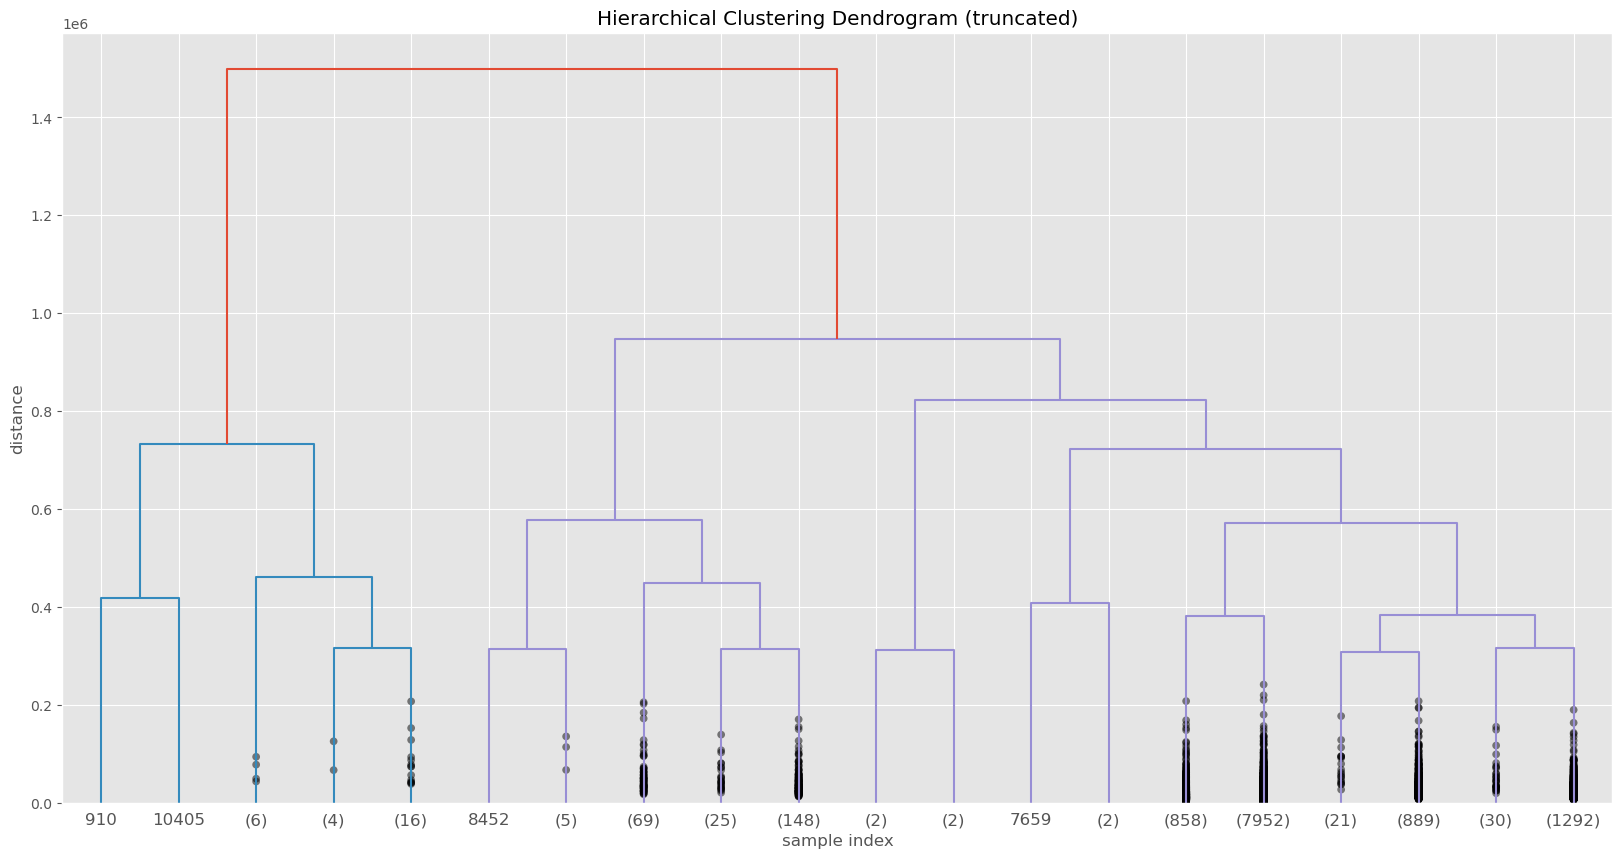

In [27]:
plt.figure(figsize=(20,10))

plt.title('Hierarchical Clustering Dendrogram (truncated)')

plt.xlabel('sample index')

plt.ylabel('distance')

dendrogram(

    mergings,
    
    truncate_mode='lastp',

    p=20, 

    show_leaf_counts=True, 

    leaf_rotation=0.,

   leaf_font_size=12.,

    show_contracted=True,

    orientation='top'

)

plt.show()

In [28]:
loan_largest_pred = fcluster(mergings, 800000, criterion="distance")

In [29]:
loan_largest_pred = pd.DataFrame(loan_largest_pred)
loan_largest_pred.columns = ['largest_pred']

In [34]:
results_largeloan = pd.concat([results_largeloan, loan_largest_pred], axis=1)

In [35]:
results_largeloan

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,risk_factor,emp_length,annual_inc,...,tot_coll_amt,tot_cur_bal,total_credit_rv,dti,loan_is_bad_num,loan_currency_num,K3 - Predicted,K8 - Predicted,labels3,largest_pred
0,0,2000,2000,2000.0,36,17.27,71.58,-3,2.0,26000.0,...,0.0,36339.0,9800.0,0.256,0,1,2,1,0,4
1,14,10500,10500,10500.0,36,17.27,375.77,-3,10.0,80000.0,...,0.0,75921.0,43100.0,0.291,1,0,2,1,0,4
2,19,10000,10000,9950.0,36,17.27,357.88,-3,4.0,60000.0,...,0.0,312510.0,48800.0,0.186,0,0,2,1,2,4
3,20,16000,16000,16000.0,60,17.27,399.97,-3,7.0,122000.0,...,0.0,62941.0,23300.0,0.182,1,0,2,1,0,4
4,31,6500,6500,6500.0,36,17.27,232.62,-3,5.0,42000.0,...,0.0,58025.0,5800.0,0.260,0,0,2,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11320,49806,16000,16000,16000.0,60,24.83,468.03,-6,4.0,40000.0,...,0.0,0.0,0.0,0.302,0,0,2,1,0,4
11321,49810,3500,3500,3500.0,60,24.33,101.36,-6,6.0,80000.0,...,0.0,0.0,0.0,0.278,0,0,2,1,0,4
11322,49856,14000,14000,14000.0,36,24.70,554.42,-6,10.0,56000.0,...,0.0,99731.0,31821.0,0.229,1,0,2,1,0,4
11323,49878,8000,8000,8000.0,60,24.70,233.41,-6,6.0,100000.0,...,0.0,97918.0,33514.0,0.207,0,1,2,1,0,4


### Summary

- This code created a dendrogram based upon the data from the loan_largest dataframe, and then created clusters based upon an arbitrary cutoff point on the dendrogram. 
- Choosing 800000 as my cut off point, it results in four clusters. 
- These prediction values are then concatenated to the results_large_loan dataframe from the previous section. 
- This section was interestingdue to the visualization dimension, and the artificial way that the number of clusters are selected. It would be interesting to see this applied to a dataset where the difference between clusters was more obvious. 
- Lastly, the fact that one of the clusters in my artificial cut off point only contained 4 values lead to some weird values in my predictions distribution of values. 

## Section 4.4: Summary of Clusters

### Description
- In this section, I am going to explore the scaled 8 cluster KMeans data from Section 3.2.2. Since I had trouble differentiating any good information there, I am hoping that visualizations will help with generate insights. 

- If any insights are deveoped, I am then going to provide some analysis on the data to possibly help Appleton understand this lending data. 

Text(0.5, 0.98, 'KMeans 8 Cluster - Scaled Data')

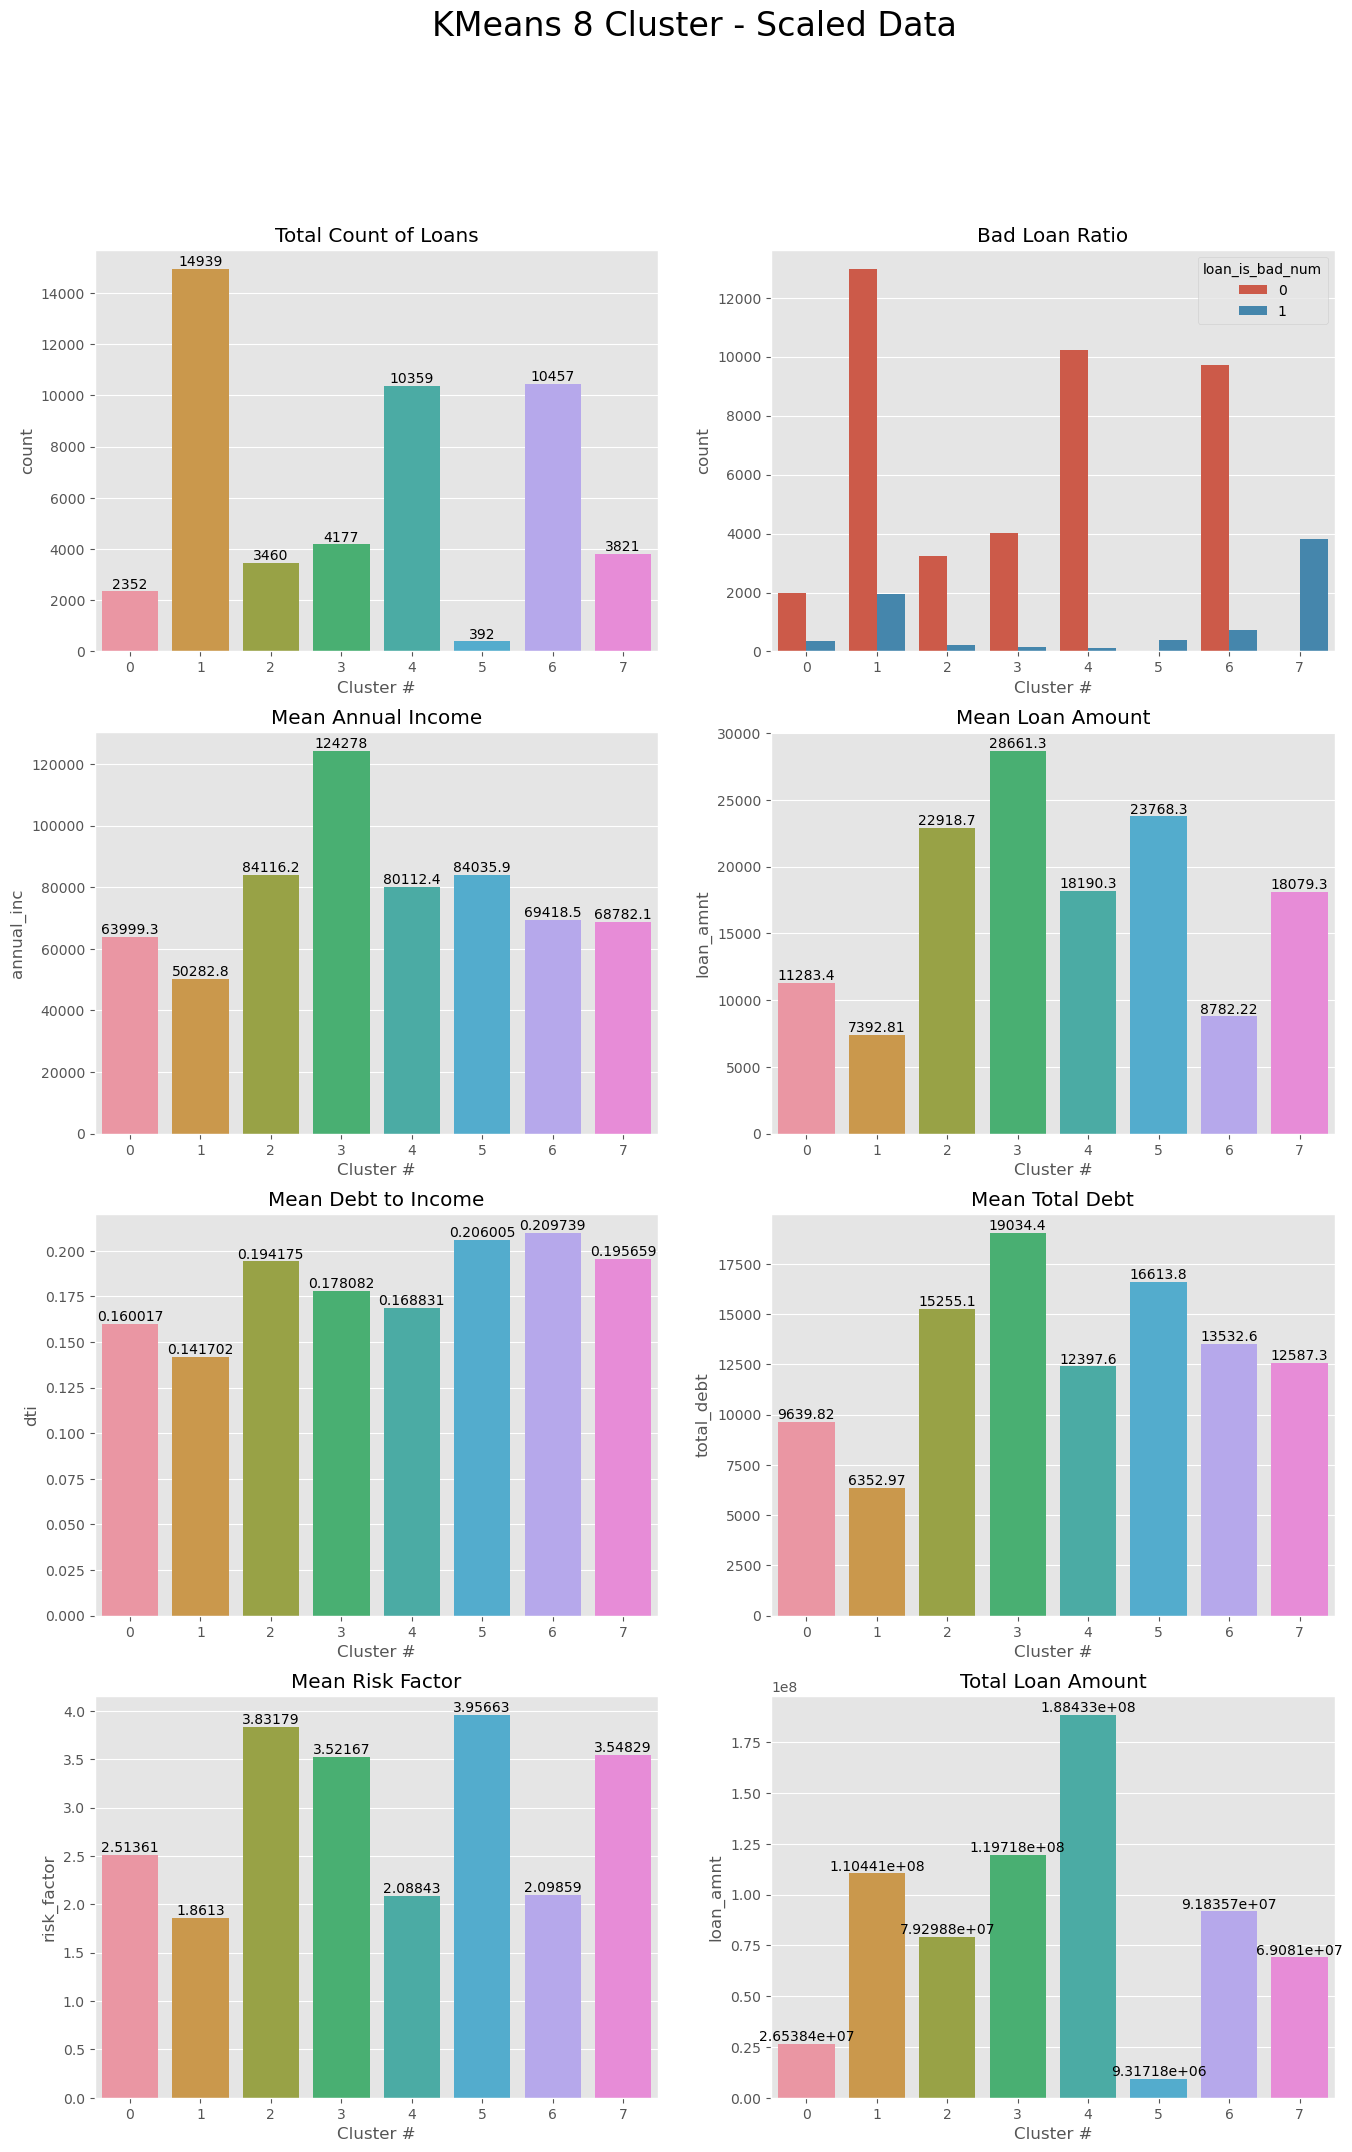

In [35]:
# Create a filtered results dataframe to display the negative results correct
results['risk_factor'] = results['risk_factor'].abs()

# Create a countplot for results 
fig, axes = plt.subplots(4,2, figsize = (16,24))

sns.countplot(data=results, x='labels8scaled', ax = axes[0,0])
axes[0,0].set_title('Total Count of Loans')
axes[0,0].set_xlabel('Cluster #')
_ = axes[0,0].bar_label(axes[0,0].containers[0]) # Using the _ to suppress the labels from printing out. 

sns.countplot(data=results , x='labels8scaled',hue='loan_is_bad_num', ax= axes[0,1])
axes[0,1].set_title('Bad Loan Ratio')
axes[0,1].set_xlabel('Cluster #')


sns.barplot(data=results, x='labels8scaled',y='annual_inc', estimator=np.mean , errorbar = None, ax = axes[1,0])
axes[1,0].set_title('Mean Annual Income')
axes[1,0].set_xlabel('Cluster #')
_ = axes[1,0].bar_label(axes[1,0].containers[0]) # Using the _ to suppress the labels from printing out. 

sns.barplot(data=results, x='labels8scaled',y='loan_amnt', estimator=np.mean,errorbar=None, ax = axes[1,1])
axes[1,1].set_title('Mean Loan Amount')
axes[1,1].set_xlabel('Cluster #')
_ = axes[1,1].bar_label(axes[1,1].containers[0]) # Using the _ to suppress the labels from printing out. 

sns.barplot(data=results, x='labels8scaled',y='dti', estimator=np.mean , errorbar = None, ax = axes[2,0])
axes[2,0].set_title('Mean Debt to Income')
axes[2,0].set_xlabel('Cluster #')
_ = axes[2,0].bar_label(axes[2,0].containers[0]) # Using the _ to suppress the labels from printing out. 

sns.barplot(data=results, x='labels8scaled',y='total_debt', estimator=np.mean, errorbar=None, ax = axes[2,1])
axes[2,1].set_title('Mean Total Debt')
axes[2,1].set_xlabel('Cluster #')
_ = axes[2,1].bar_label(axes[2,1].containers[0]) # Using the _ to suppress the labels from printing out. 

sns.barplot(data=results, x='labels8scaled',y='risk_factor', estimator=np.mean, errorbar=None, ax = axes[3,0])
axes[3,0].set_title('Mean Risk Factor')
axes[3,0].set_xlabel('Cluster #')
_ = axes[3,0].bar_label(axes[3,0].containers[0]) # Using the _ to suppress the labels from printing out. 

sns.barplot(data=results, x='labels8scaled',y='loan_amnt', estimator=np.sum,errorbar=None, ax = axes[3,1])
axes[3,1].set_title('Total Loan Amount')
axes[3,1].set_xlabel('Cluster #')
_ = axes[3,1].bar_label(axes[3,1].containers[0]) # Using the _ to suppress the labels from printing out. 

fig.suptitle('KMeans 8 Cluster - Scaled Data', fontsize = 24)


### Summary
- The code above shows a series of barcharts that illustrate the 8 clusters formed in the KMeans 8 Cluster Scaled Data analysis from section 3.2.2. 
- Some interesting characteristics of this data are the relationships between these measurements. 
    - First, two of the clusters contain only bad loans. These also are two of the three highest risk factor loan clusters. Both of these clusters are also the highest debt-to-income clusters. 
    - The lowest risk factor loans are being given out to the most lendees, and the second lowest risk factor loans have by far the greatest total loan amounts. 
    - The highest income cluster has the third highest total loans given out, and the third highest risk factors. For this reason, it would be important to keep a pulse on the financial health of these high risk loans. They make up a susbstantial amount of the loaned out money, and if too many of them turn into bad loans, it could be financially troubling for the lender. 
    
- In viewing the risk factors, total loan amounts, and the total number of loans (both good and bad), I believe that these visualizations could provide some deeper insights into the types of customers and the mix of liabilities that Appleton has in its lending program. Finding out where the majority of the financial income is being generated, and the nature of their risk, can help Appleton prepare and adapt over time to potentially favorable or unfavorable changes in the economy. 

Sources for visualization: 
- (Matplotlib viz) https://matplotlib.org/stable/gallery/lines_bars_and_markers/index.html 
- (Seaborn barplots) https://seaborn.pydata.org/generated/seaborn.barplot.html